<a href="https://colab.research.google.com/github/GauraoM/ML-Basics-Definitions/blob/main/Python_nonlinear_regression_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library and read the csv
import pandas as pd
x = pd.read_csv("https://apmonitor.com/che263/uploads/Main/heart_rate.txt")
x.head()

,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108


In [ ]:
# Print Statistics
x.describe()

,Time (sec),Heart Rate (BPM)
count,241.000000,241.000000
mean,600.000000,142.983402
std,348.574478,11.387115
min,0.000000,103.000000
25%,300.000000,138.000000
50%,600.000000,147.000000
75%,900.000000,151.000000
max,1200.000000,154.000000


In [ ]:
import numpy as np
def bpm(t,c0,c1,c2,c3):
  return c0+c1*t-c2*np.exp(-c3*t)

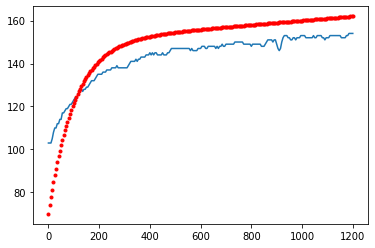

In [ ]:
# Guess values
g = [150,0.01,80,0.01]

n = len(x['Time (sec)'])
y = np.empty(n)

# Plot time vs BPM
%matplotlib inline
import matplotlib.pyplot as plt

# Iterate over time and plt it
for i in range(n):
  y[i] = bpm(x['Time (sec)'][i],g[0],g[1],g[2],g[3])
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'r.')

[1.42373197e+02 9.24806119e-03 4.00292042e+01 6.84029127e-03]


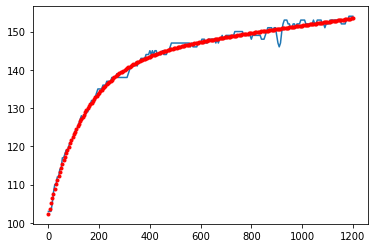

In [ ]:
# Fit the curve using scipy.optimize
from scipy.optimize import curve_fit
t = x['Time (sec)']
hr =  x['Heart Rate (BPM)']

# get parameter and covarience
c,cov = curve_fit(bpm,t,hr,g)
print(c)

n = len(x['Time (sec)'])
y = np.empty(n)

# Iterate over time and plt it
for i in range(n):
  y[i] = bpm(x['Time (sec)'][i],c[0],c[1],c[2],c[3])
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'r.')

In [ ]:
# Calculate R^2 values for fit 
from sklearn.metrics import r2_score
print('R^2:',r2_score(y,hr))

R^2: 0.9929887696680648
